In [4]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [5]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

In [6]:
# Load Data

In [7]:
# Read the census data into a Pandas DataFrame
file_path = Path("toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [8]:
#Dwelling Types Per Year

In [9]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
# YOUR CODE HERE!

In [61]:
dwelling_per_year = to_data.groupby(["year"]).sum().drop(columns=['average_house_value','shelter_costs_owned','shelter_costs_rented'])
dwelling_per_year.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [62]:
# Save the dataframe as a csv file


In [63]:
#dwelling_per_year.to_csv()
dwelling_per_year.to_csv()

'year,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house\r\n2001,300930,355015,75,90995,52355,23785,116900,3040\r\n2006,266860,379400,165,69430,54690,44095,162850,1335\r\n2011,274940,429220,100,72480,60355,44750,163895,2165\r\n2016,269680,493270,95,71200,61565,48585,165575,2845\r\n'

In [64]:
# Helper create_bar_chart function
#def create_bar_chart(data, title, xlabel, ylabel, color):
   
    
#def createBarChart(colName):
#    df[colName].hist(align='mid')
#    plt.title(str(colName))
#    var = set_xlabel(xlabel)
#    var = .set_ylabel(ylabel)
#    RUNS = [1,2,3,4,5]
#    plt.xticks(RUNS)
#    plt.show()

#

def bar_charts(data, title, xlabel, ylabel, color):
    par = data.plot(kind="bar",title = title, color=color)
    par.set_xlabel(xlabel), par.set_ylabel(ylabel)
    plt.show()
    
    
    
    



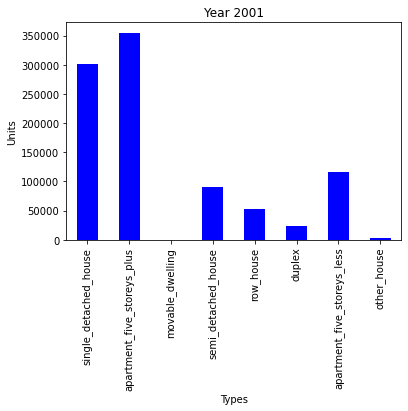

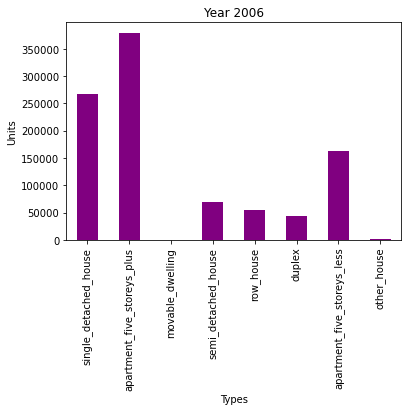

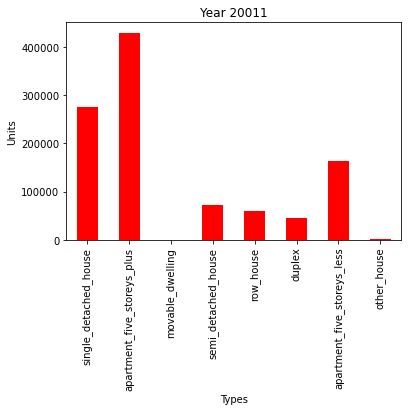

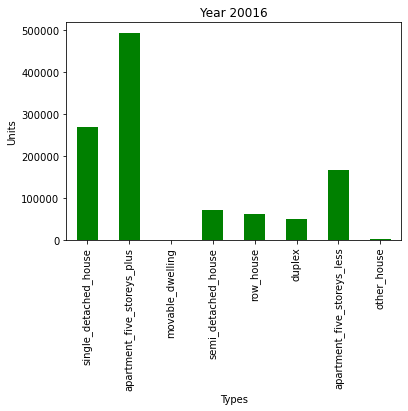

In [86]:
# Create a bar chart per year to show the number of dwelling types

# I think my hvplot is not working as I am not getting an output **


 # Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
# YOUR CODE HERE!
bar_charts(data=dwelling_per_year.loc[2001], 
           title="Year 2001",color='blue', xlabel='Types', ylabel="Units"
          )

# Bar chart for 2006
# YOUR CODE HERE!
bar_charts(data=dwelling_per_year.loc[2006], 
           title="Year 2006",color='purple', xlabel='Types', ylabel="Units"
          )

# Bar chart for 2011
# YOUR CODE HERE!
bar_charts(data=dwelling_per_year.loc[2011], 
           title="Year 20011",color='red', xlabel='Types', ylabel="Units"
          )
# Bar chart for 2016
# YOUR CODE HERE!
bar_charts(data=dwelling_per_year.loc[2016], 
           title="Year 20016",color='green', xlabel='Types', ylabel="Units"
          )

In [71]:
# Average Monthly Shelter Costs in Toronto Per Year

In [72]:
 # Calculate the average monthly shelter costs for owned and rented dwellings
# YOUR CODE HERE!

In [93]:
#helter_costs = to_data['shelter_costs_owned','shelter_costs_rented']
#helter_costs.head()
new_data = to_data.drop(columns=['single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house','average_house_value'])
shelter_costs = new_data.groupby(['year']).mean()
shelter_costs.head()

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [94]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    par = data.plot(kind="line",title = title, color=color)
    par.set_xlabel(xlabel), par.set_ylabel(ylabel)
    plt.show()
   

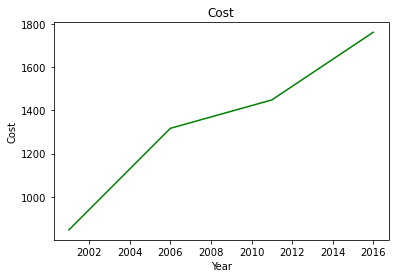

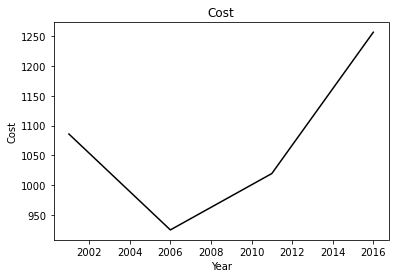

In [95]:
 # Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(data= shelter_costs['shelter_costs_owned']
                  , title="Cost", xlabel='Year', ylabel='Cost', color='green'
                 )

# Line chart for rented dwellings
create_line_chart(data= shelter_costs['shelter_costs_rented']
                  , title="Cost", xlabel='Year', ylabel='Cost', color='black'
                 )

In [91]:
#Average House Value per Year

In [92]:
# Calculate the average house value per year
# YOUR CODE HERE!

In [97]:
#avg_house_val = to_data.groupby(['year', 'average_house_value']).mean()
#avg_house_val.head()

avg_hosue_val = to_data['average_house_value'].groupby(['year']).mean()
avg_hosue_val.head()

#year
#2001    289882.885714
#2006    424059.66428632011    530424.721429
#2016    664068.328571
#Name: average_house_value, dtype: float64

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

<AxesSubplot:xlabel='year'>

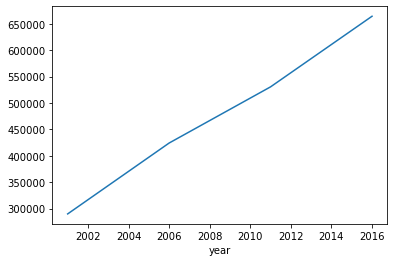

In [98]:
 # Plot the average house value per year as a line chart
avg_hosue_val.plot()

In [99]:
# Average House Value by Neighbourhood

In [100]:
# Create a new DataFrame with the mean house values by neighbourhood per year
# YOUR CODE HERE!

In [104]:
#to_data.reset_index()

In [105]:
#avg_by_neigh = to_data[['year','neighbourhood','average_house_value']]

In [106]:
reset_data = to_data.reset_index()

In [107]:
avg_by_neigh = reset_data[['year','neighbourhood','average_house_value']]


In [108]:
avg_by_neigh.head()

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864


In [109]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!
avg_by_neigh.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [113]:
#avg_by_neigh.hvplot(x='year', y='average', groupby='neighbourhood', color='black', xlabel="Year", ylabel='Value')

<AxesSubplot:>

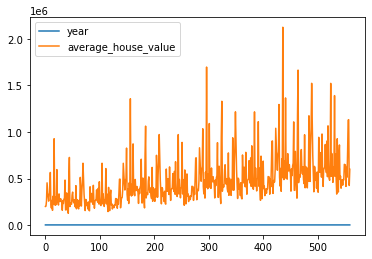

In [115]:
# The code above im not sure what is wrong it keeps saying dimensions error even when i specify sizes 
#DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['average']


#for now please accept this very modest plot :)

avg_by_neigh.plot()

In [116]:
#Number of Dwelling Types per Year

In [117]:
# Fetch the data of all dwelling types per year
# YOUR CODE HERE!

In [118]:
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [119]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!

<AxesSubplot:xlabel='year'>

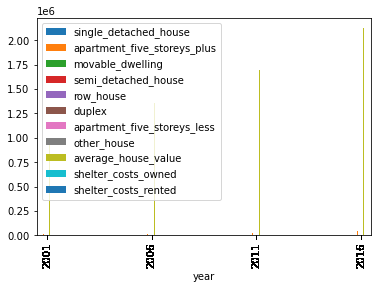

In [121]:
#to_data.hvplot(x='year', y='Type', groupby='neighbourhood', color='black', xlabel="Year", ylabel='Value', title = "Dwelling Types per Neighbourhood")
# same issue as above 
to_data.plot(kind="bar")

In [122]:
#The Top 10 Most Expensive Neighbourhoods
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!

In [126]:
pricey_to_live = to_data.reset_index()
summary = pricey_to_live[['neighbourhood', 'average_house_value']].groupby('neighbourhood').sum()
summary.head()


,average_house_value
neighbourhood,
Agincourt North,1319246
Agincourt South-Malvern West,1336756
Alderwood,1711690
Annex,2987908
Banbury-Don Mills,2448156


In [129]:
summary = pricey_to_live.nlargest(10,'average_house_value')
summary.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
436,2016,Bridle Path-Sunnybrook-York Mills,2275,590,0,40,230,30,80,0,2124653,2903,2942
296,2011,Bridle Path-Sunnybrook-York Mills,2285,480,0,45,100,30,50,0,1697067,2387,2388
464,2016,Forest Hill South,1685,2025,0,65,40,70,1050,0,1664653,2383,1486
489,2016,Lawrence Park South,3420,925,0,110,35,230,1015,5,1522732,2644,1515
524,2016,Rosedale-Moore Park,2450,4990,0,485,260,345,1505,5,1522193,2498,1809


<AxesSubplot:>

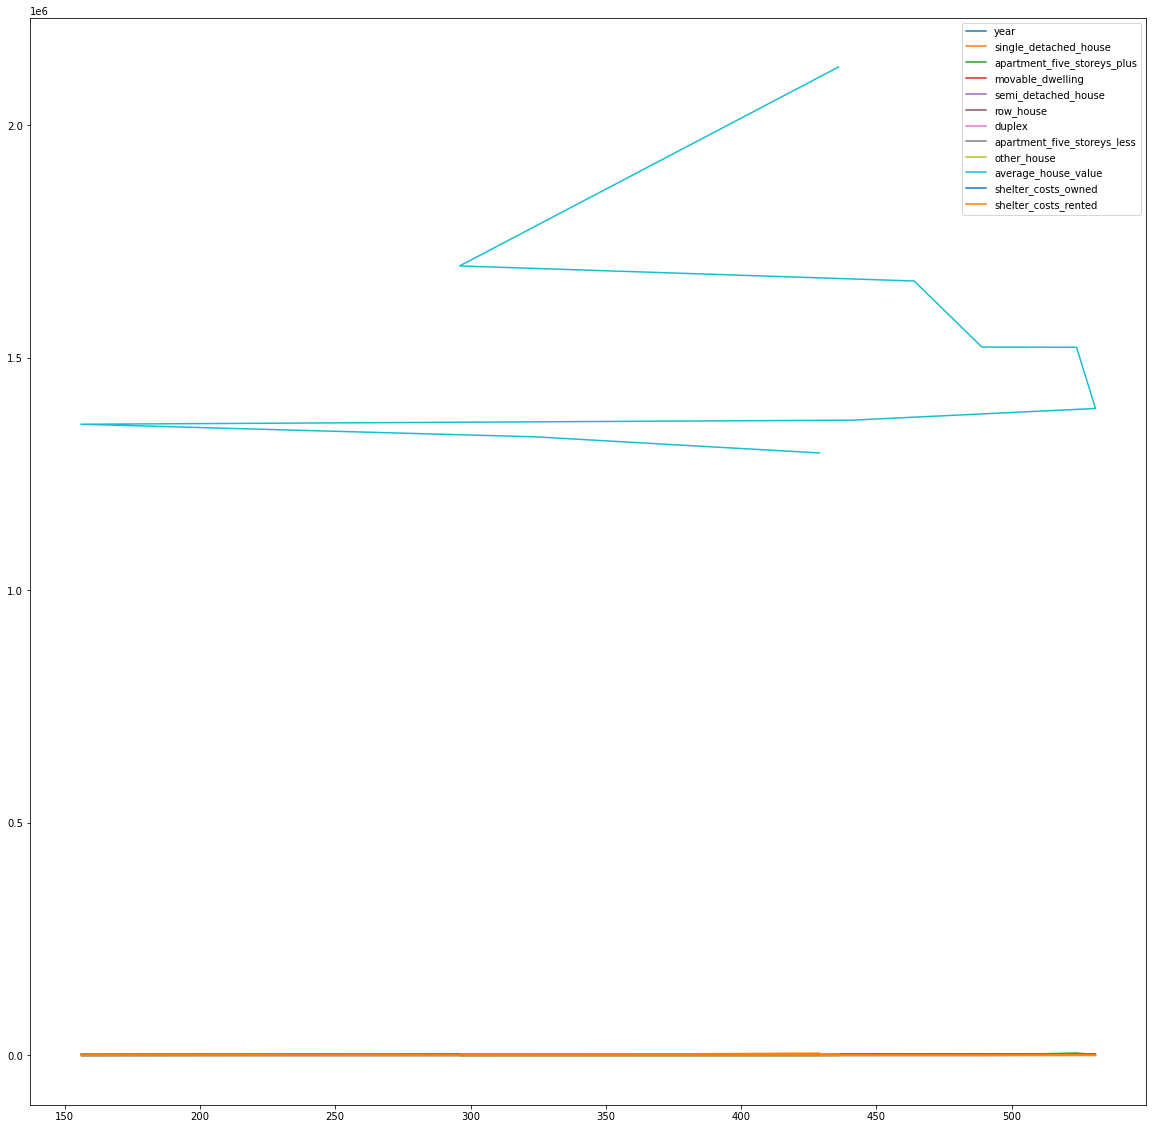

In [135]:
# Plotting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
summary.plot( figsize = (20,20) )

In [136]:
#Neighbourhood Map

In [137]:
# Load Location Data

In [138]:
 # Load neighbourhoods coordinates data
file_path = Path("toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


In [139]:
# Data Preparation

In [140]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

In [157]:
mean_neigh = to_data.groupby(['neighbourhood']).mean().reset_index()
mean_neigh.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [158]:
# Join the average values with the neighbourhood locations
# YOUR CODE HERE!

In [159]:
combined_neigh_df = pd.concat([df_neighbourhood_locations, mean_neigh], axis=1, join='inner').reset_index()
combined_neigh_df.head()

,index,neighbourhood,lat,lon,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,0,Agincourt North,43.805441,-79.266712,Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,1,Agincourt South-Malvern West,43.788658,-79.265612,Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,2,Alderwood,43.604937,-79.541611,Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,3,Annex,43.671585,-79.404001,Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,4,Banbury-Don Mills,43.737657,-79.349718,Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [160]:
# Create a scatter mapbox to analyze neighbourhood info
# YOUR CODE HERE!

In [165]:
mapbox_tool = px.scatter_mapbox(
    combined_neigh_df,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="neighbourhood",
    color_continuous_scale=px.colors.cyclical.IceFire,
    zoom=9,
    width=1000,
    
    
)
mapbox_tool.show()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().